### Import Packages

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from google.colab import files
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics

from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Data

In [3]:
wave1_data = pd.read_csv('/Data/wave1_data.csv')
wave1_data['fips'] = wave1_data['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])

wave2_data = pd.read_csv('/Data/wave2_data.csv')
wave2_data['fips'] = wave2_data['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])

whole_data = pd.read_csv('/Data/whole_data.csv')
whole_data['fips'] = whole_data['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])

### Figure 1

#### Infaction

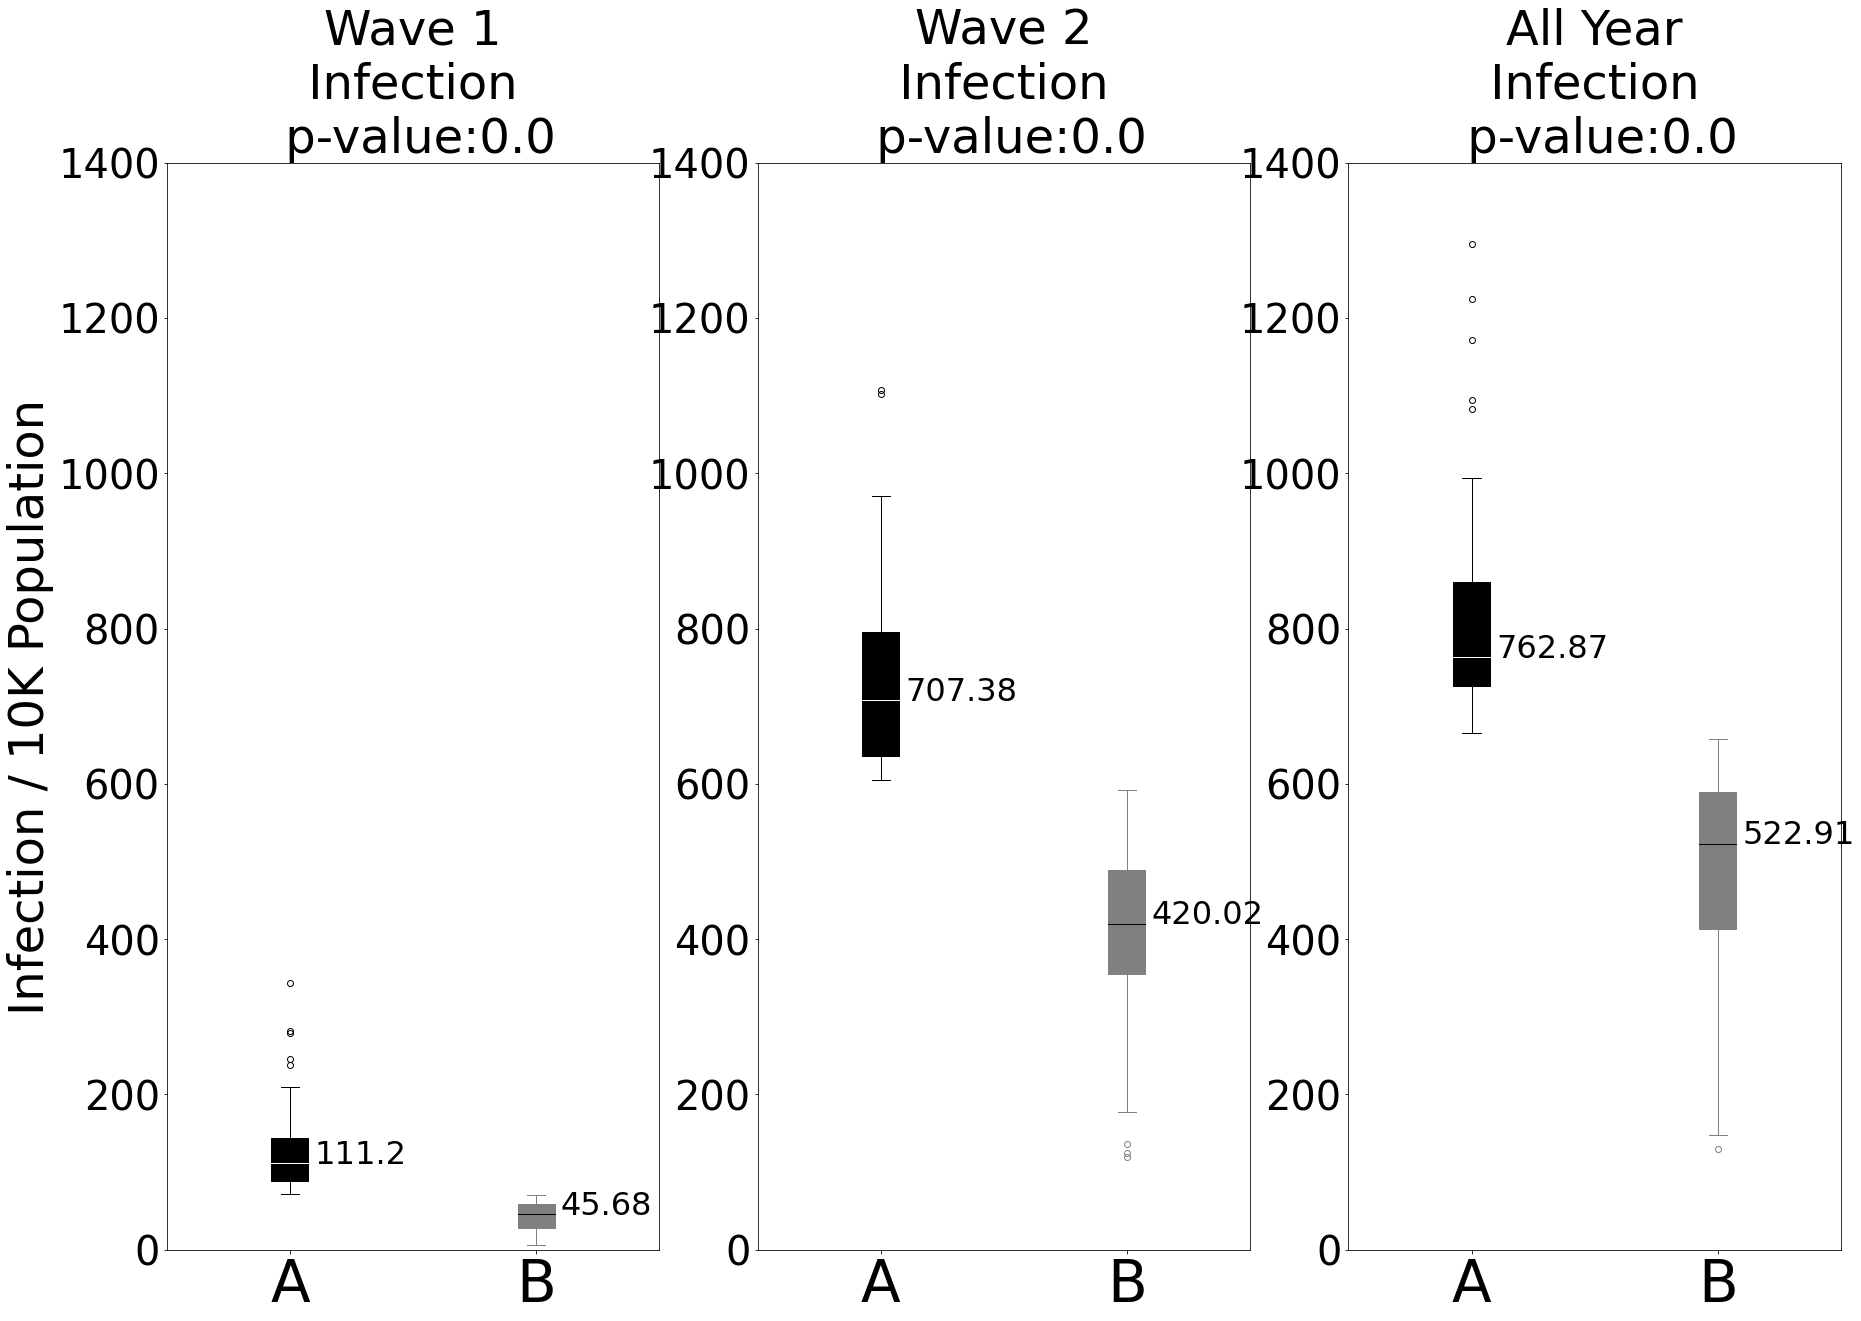

In [4]:
rindex = [1, 2, 3]
region = ['Wave 1', 'Wave 2', 'All Year']

fig, ax = plt.subplots(1, 3, figsize=(30,20))

for i in rindex:
  if i == 1:
    rdata = wave1_data
  elif i == 2:
    rdata = wave2_data
  else:
    rdata = whole_data

  para = 'cases rate 10k'

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],2)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  if i == 1: 
    ax[i-1].set_ylabel('Infection / 10K Population', fontsize = 48)
  ax[i-1].set_title(region[i-1], fontsize = 48)
  ax[i-1].set_ylim(0, 1400)
  
  ax[i-1].set_title( region[i-1] + '\n Infection \n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)

#### Fatality

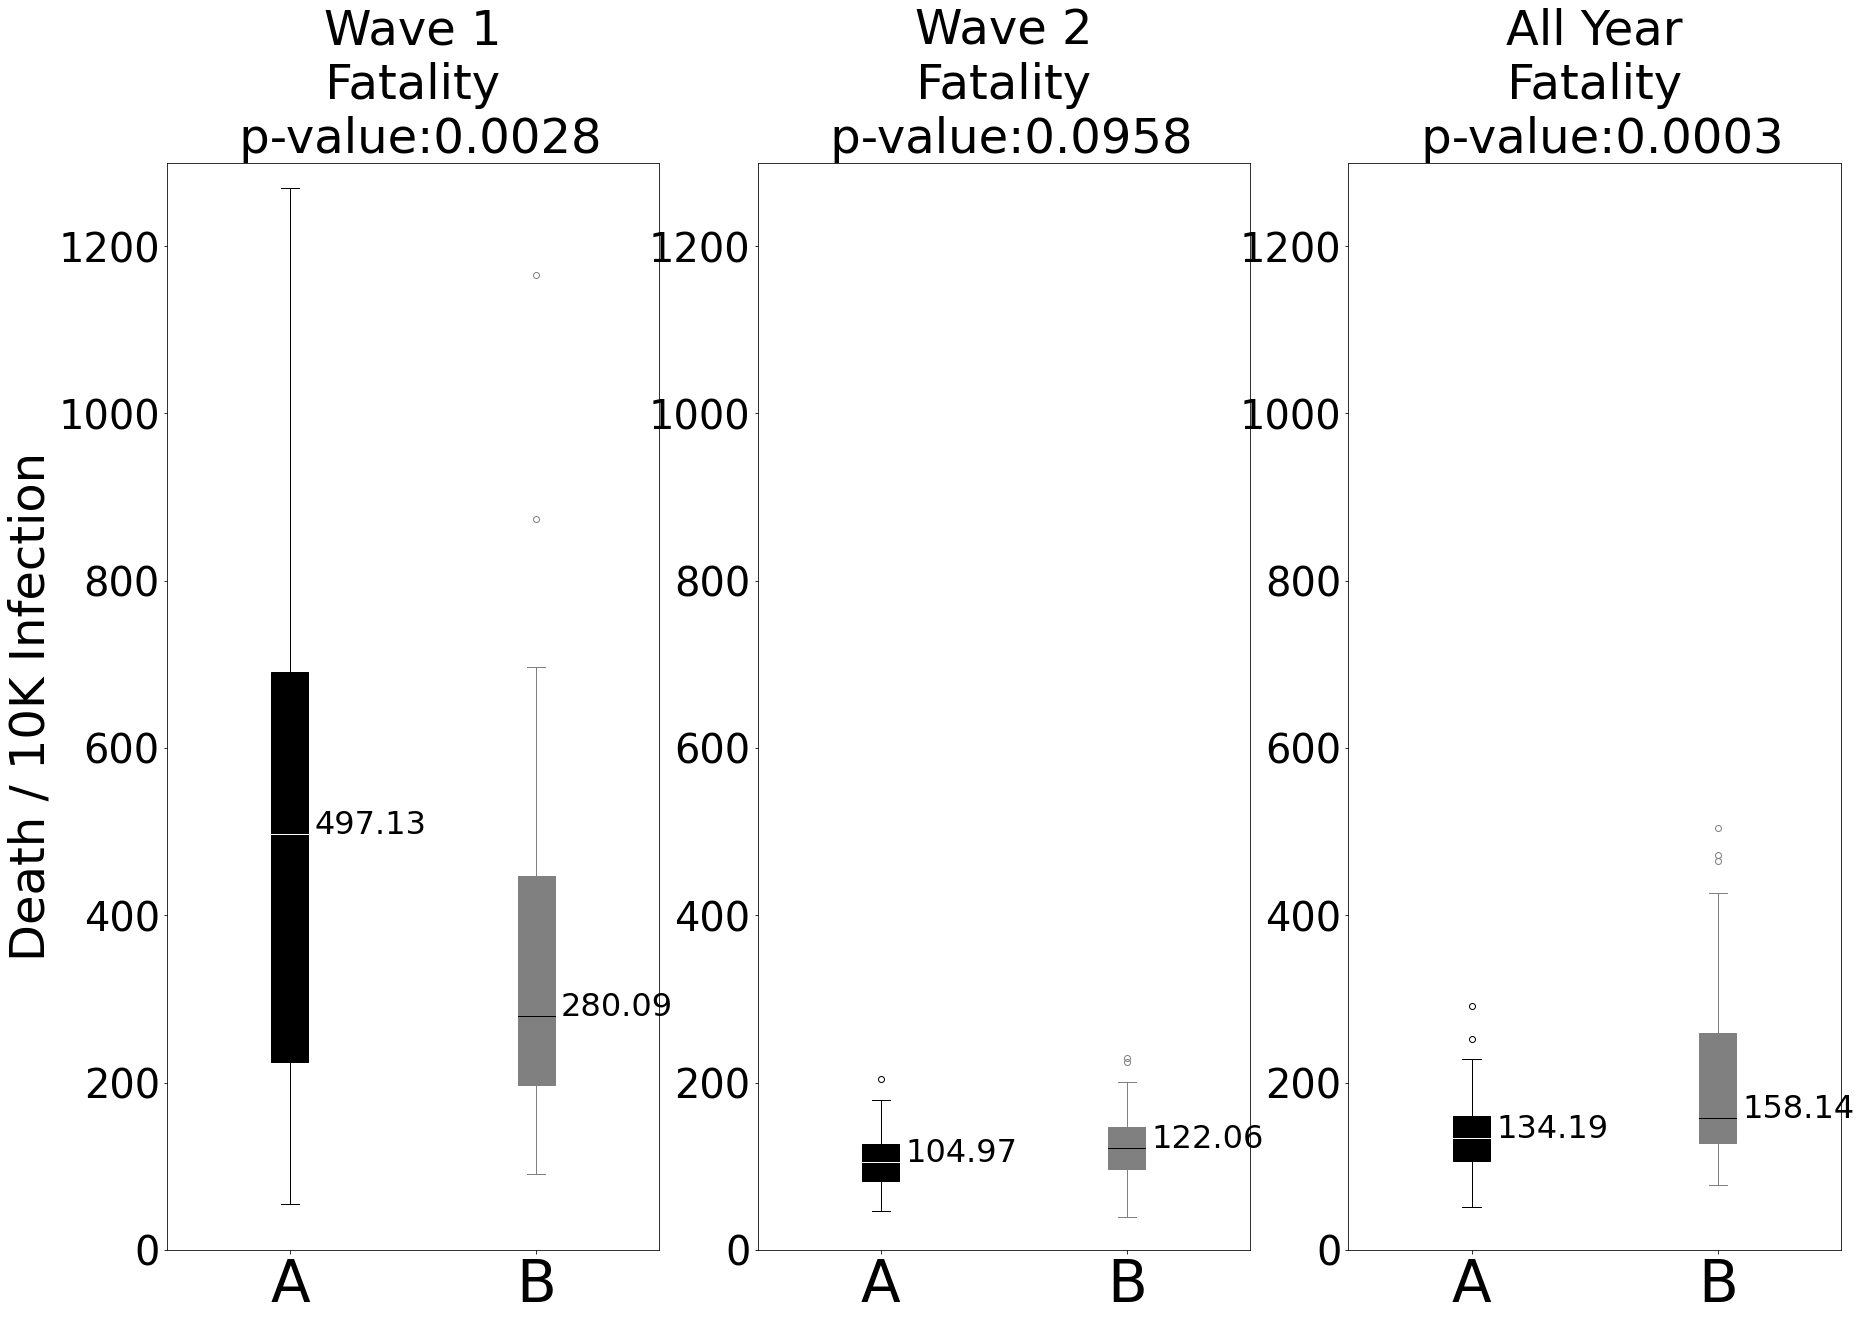

In [5]:
rindex = [1, 2, 3]
region = ['Wave 1', 'Wave 2', 'All Year']

fig, ax = plt.subplots(1, 3,figsize=(30,20))

for i in rindex:
  if i == 1:
    rdata = wave1_data
  elif i == 2:
    rdata = wave2_data
  else:
    rdata = whole_data

  para = 'deaths cases 10k'

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],2)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  if i == 1: 
    ax[i-1].set_ylabel('Death / 10K Infection', fontsize = 48)
  ax[i-1].set_title(region[i-1], fontsize = 48)
  ax[i-1].set_ylim(0, 1300)
  
  ax[i-1].set_title( region[i-1] + '\n Fatality \n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)

### Figure 2

#### Wave 1

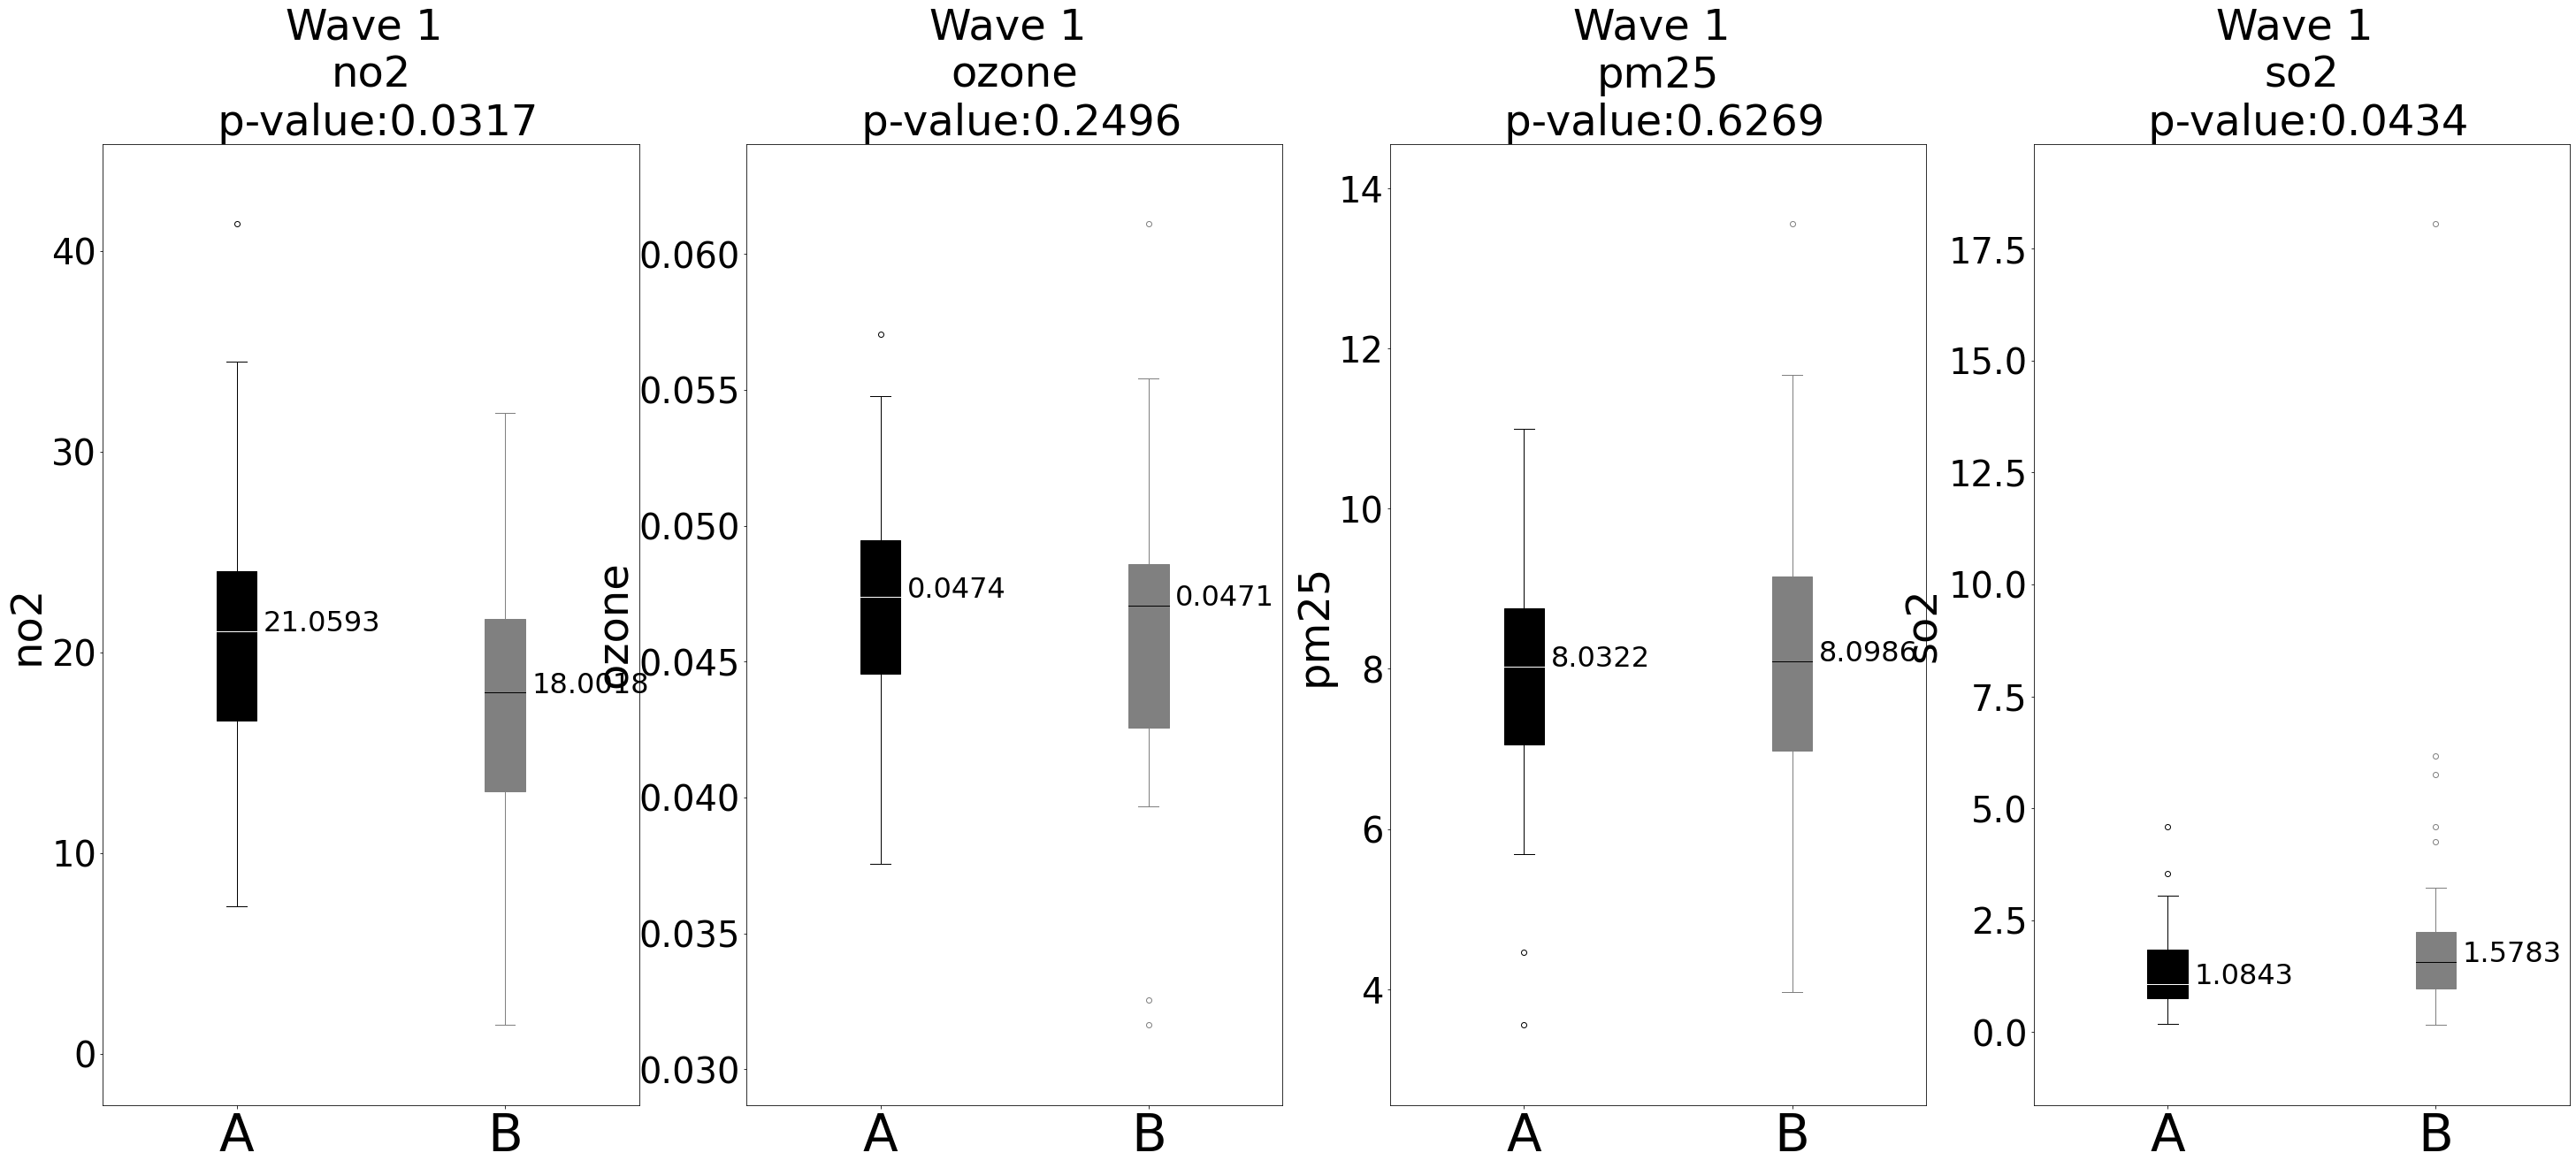

In [6]:
rdata = wave1_data.copy() 

rindex = [1, 2, 3, 4]
region = ['no2', 'ozone', 'pm25', 'so2']

fig, ax = plt.subplots(1, 4,figsize=(50,20))

for i in rindex:

  para = region[i-1]

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],4)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],4)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(region[i-1], fontsize = 48)
  ax[i-1].set_title('Wave 1 \n' + region[i-1] + '\n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)

#### Wave 2

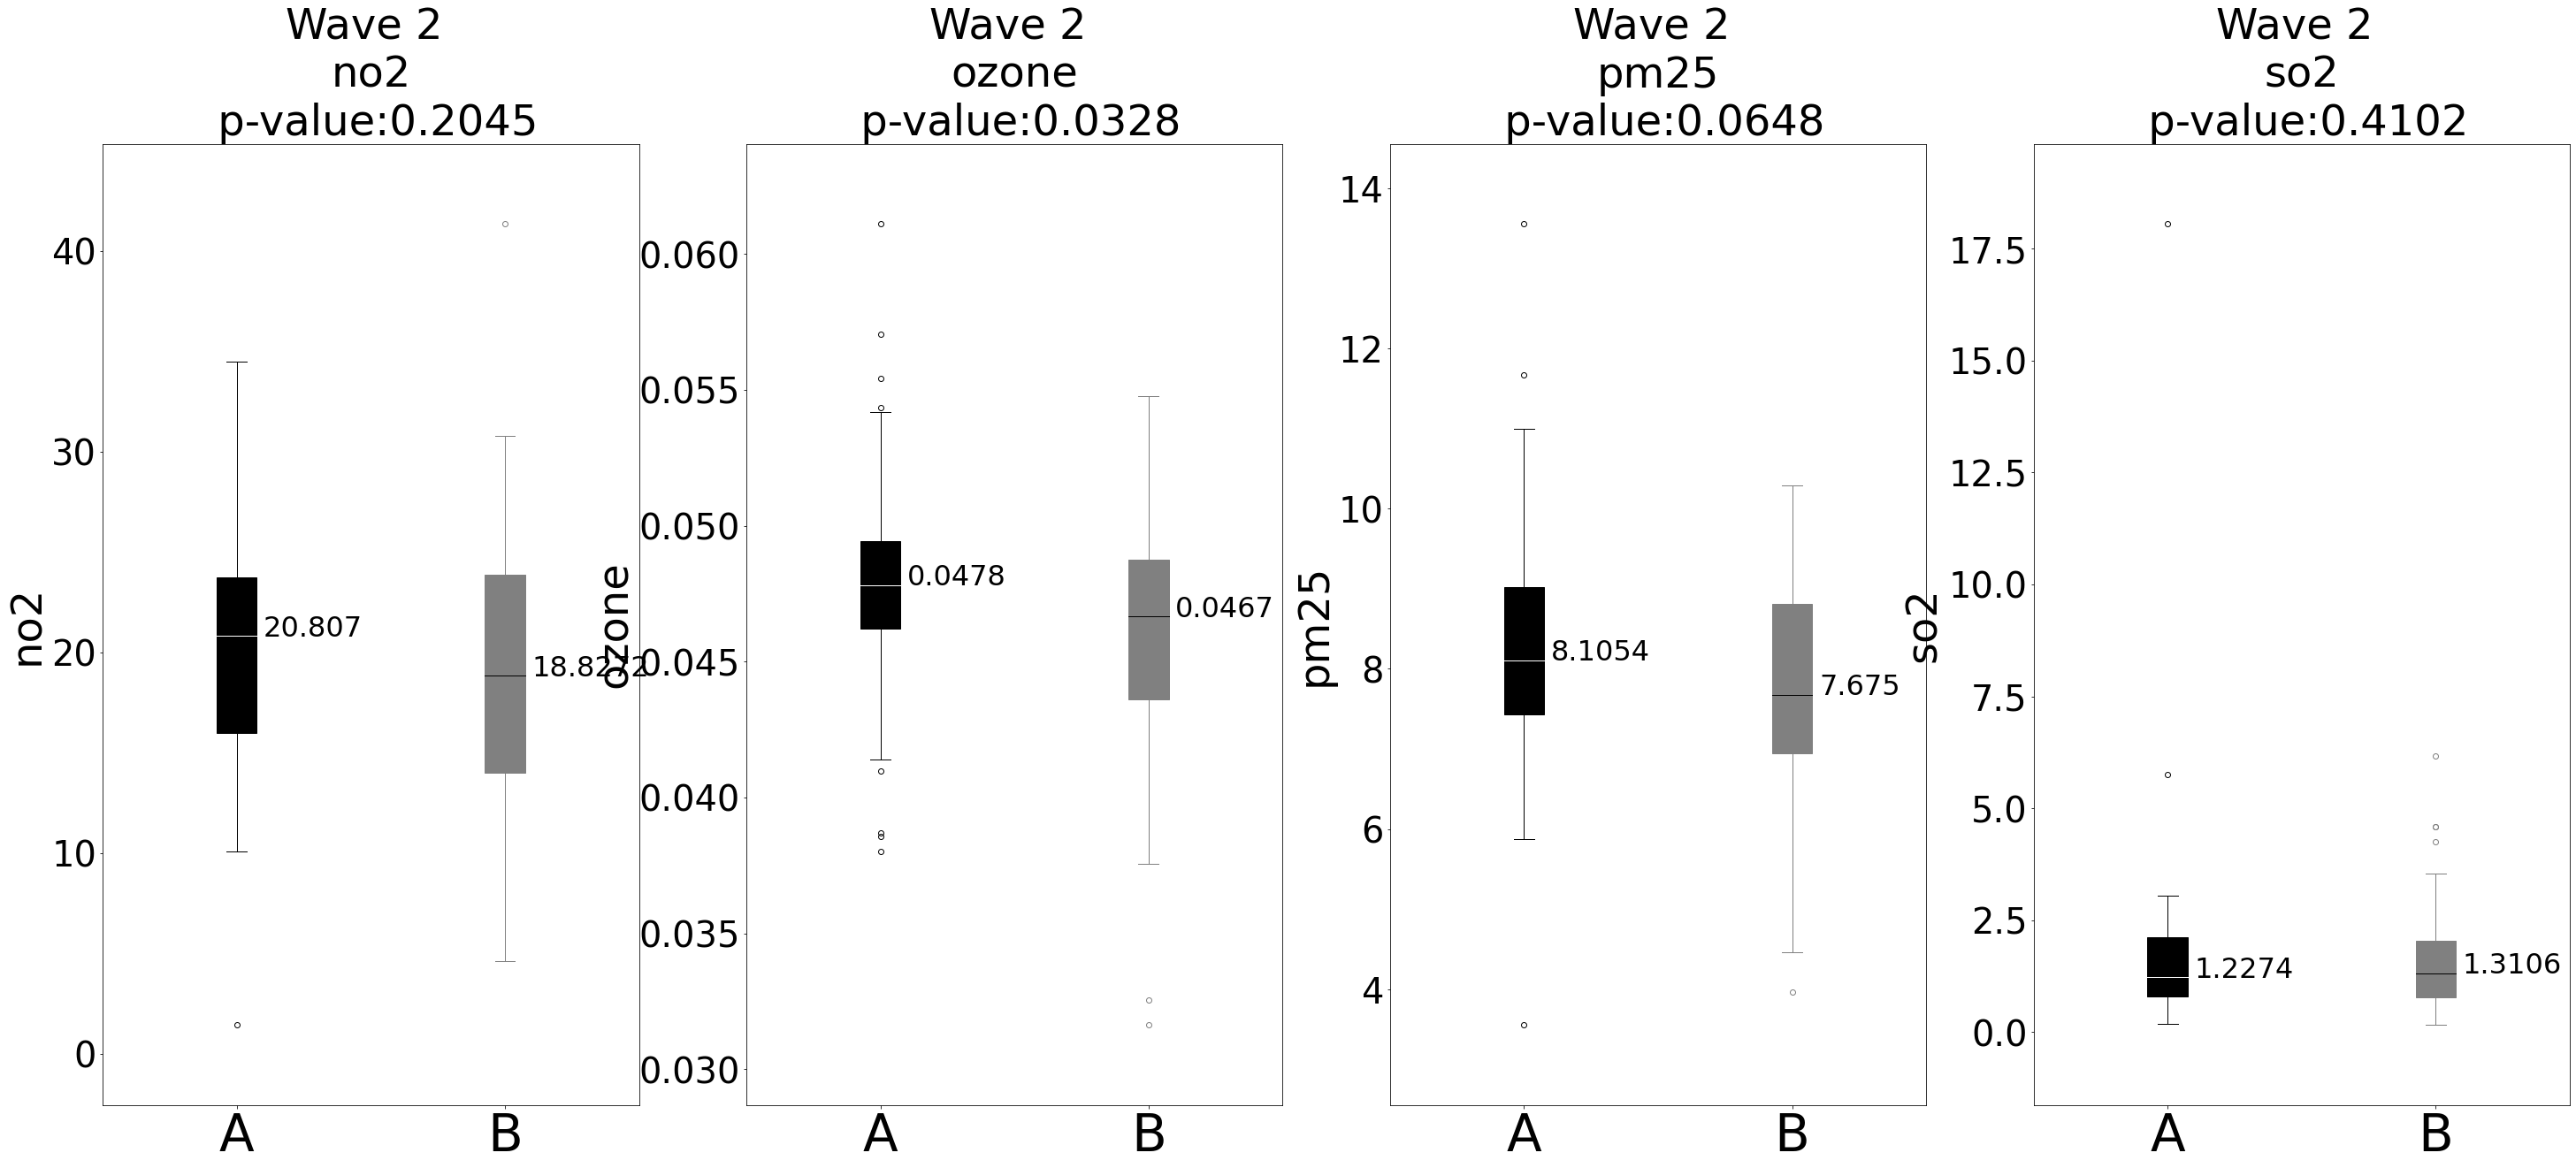

In [7]:
rdata = wave2_data.copy() 

rindex = [1, 2, 3, 4]
region = ['no2', 'ozone', 'pm25', 'so2']

fig, ax = plt.subplots(1, 4,figsize=(50,20))

for i in rindex:

  para = region[i-1]

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],4)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],4)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(region[i-1], fontsize = 48)
  ax[i-1].set_title('Wave 2 \n' + region[i-1] + '\n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)

#### All Year

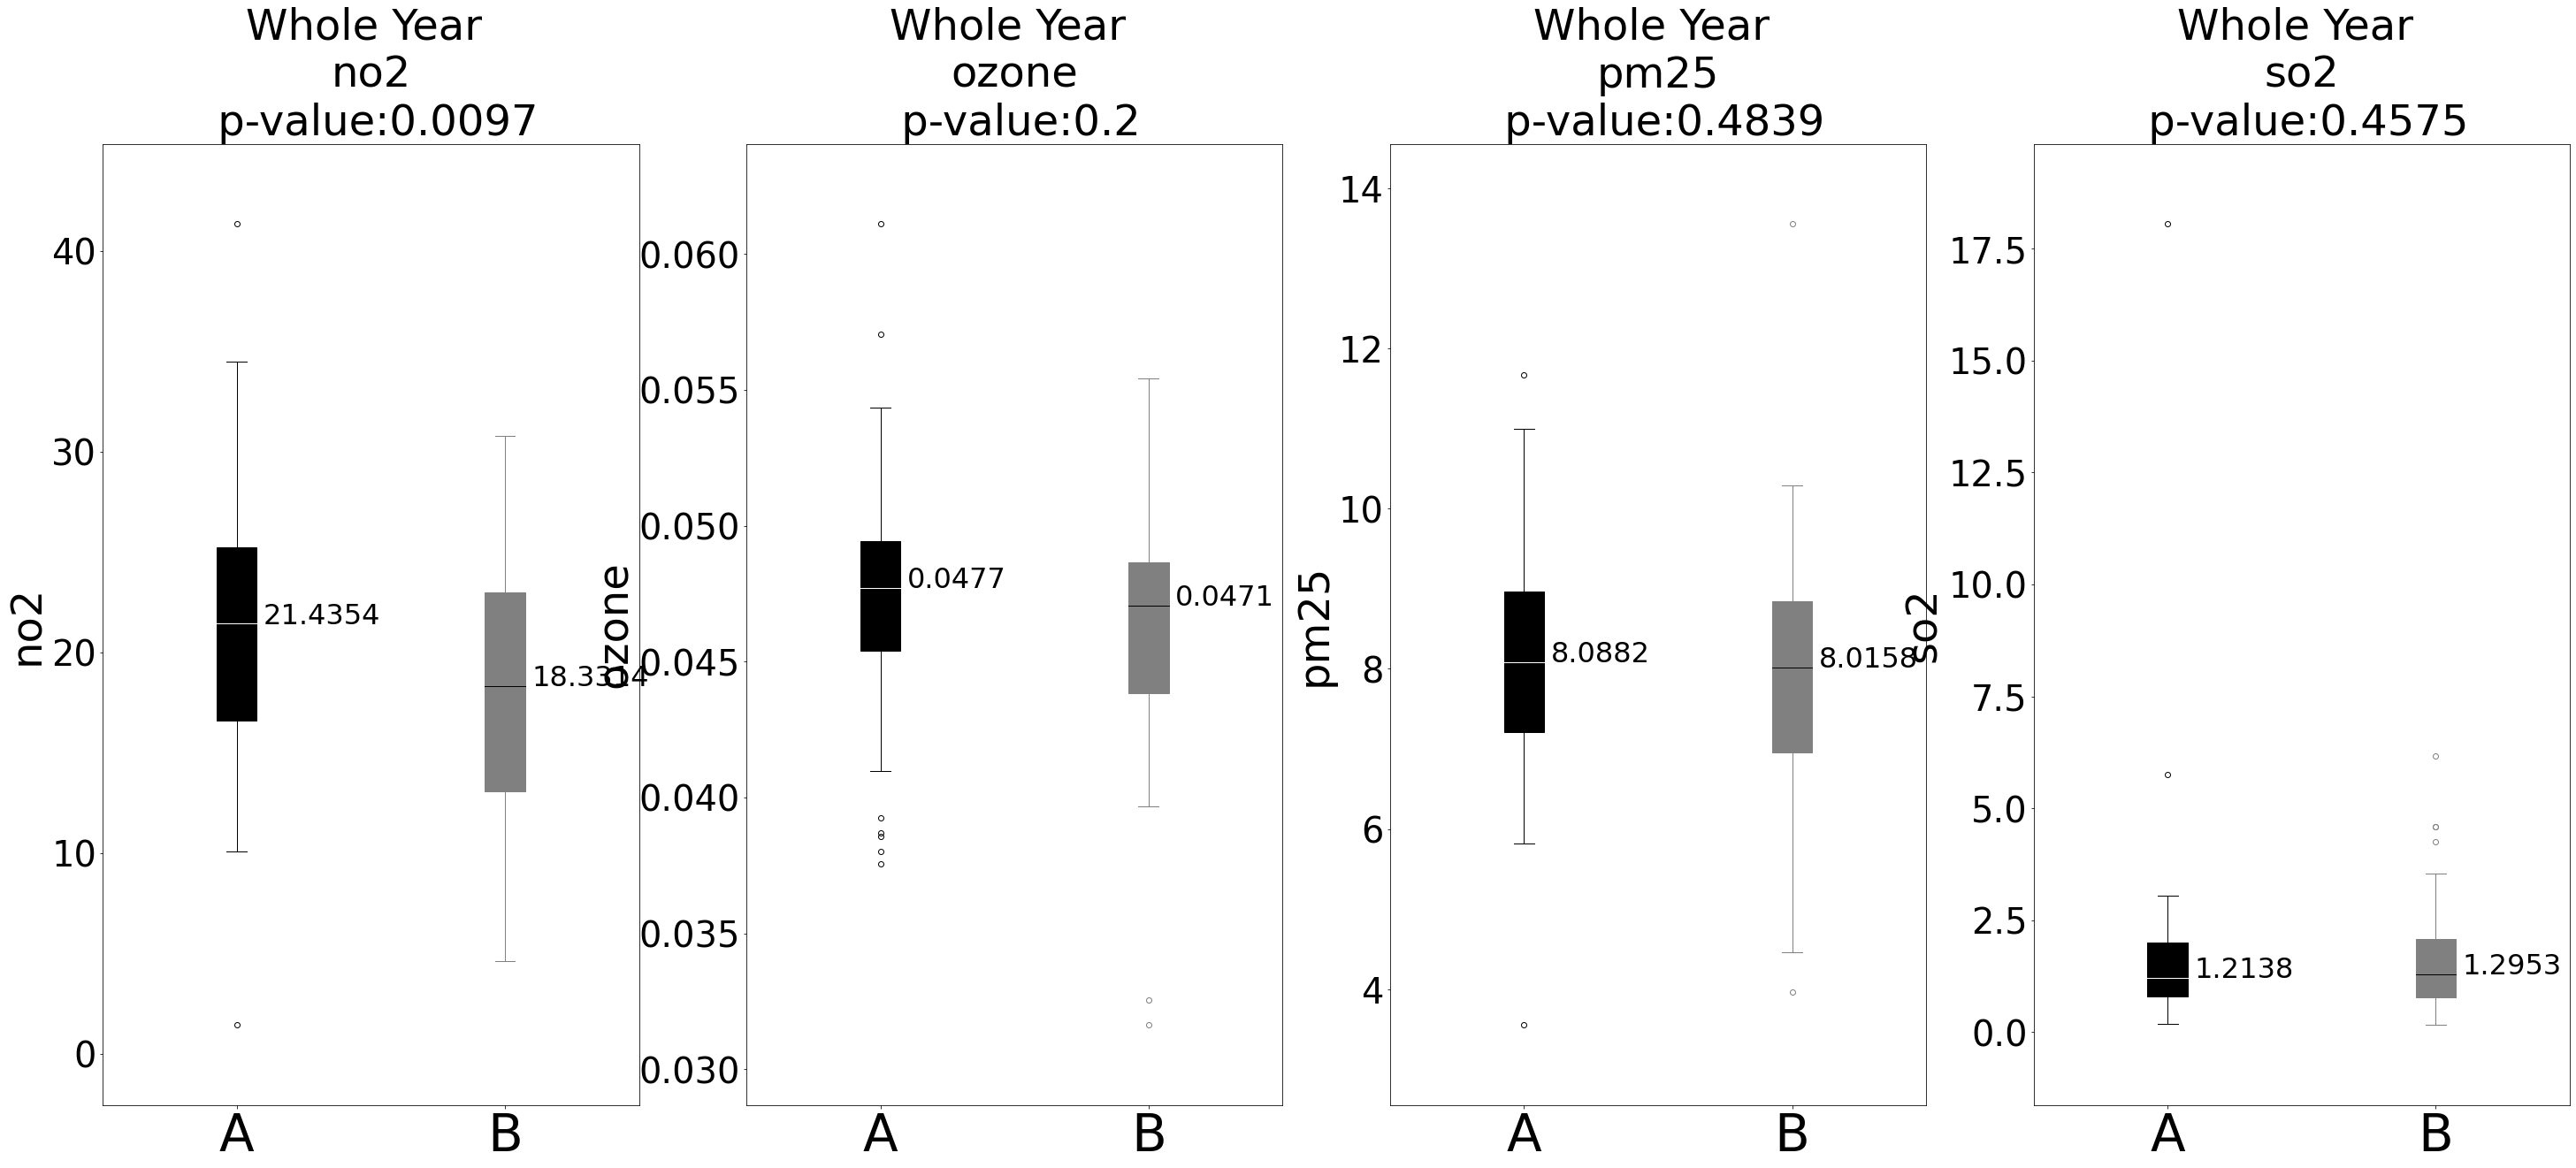

In [8]:
rdata = whole_data.copy() 

rindex = [1, 2, 3, 4]
region = ['no2', 'ozone', 'pm25', 'so2']

fig, ax = plt.subplots(1, 4,figsize=(50,20))

for i in rindex:

  para = region[i-1]

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],4)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],4)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(region[i-1], fontsize = 48)
  ax[i-1].set_title('Whole Year \n' + region[i-1] + '\n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)

### Figure 3

#### Wave 1

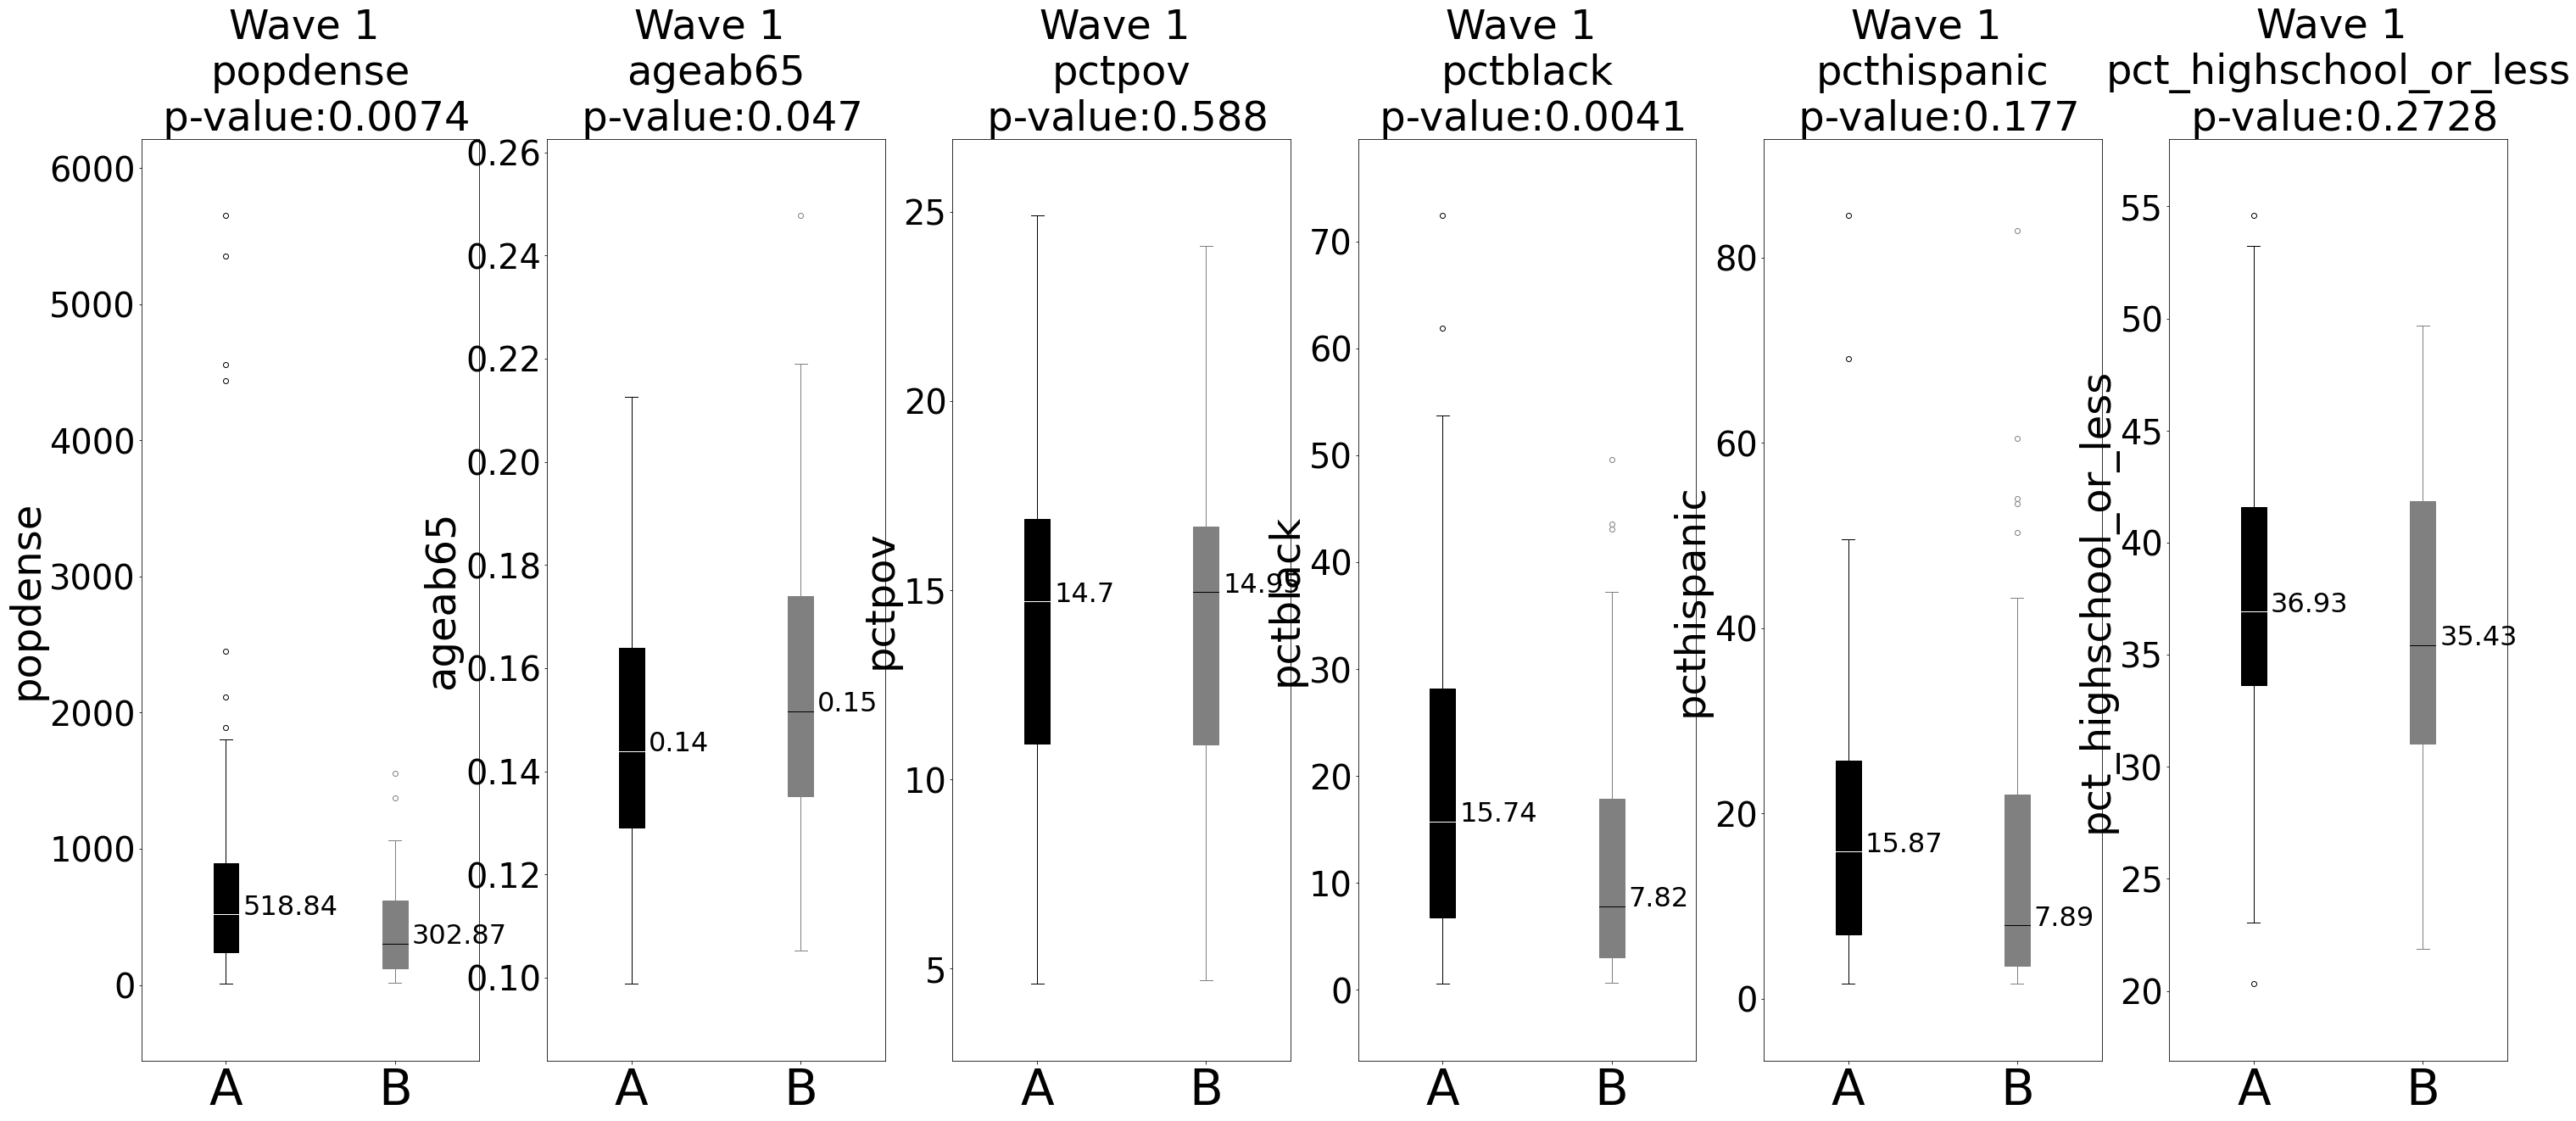

In [9]:
rdata = wave1_data.copy() 

rindex = [1, 2, 3, 4, 5, 6]
region = ['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'pct_highschool_or_less']

fig, ax = plt.subplots(1, 6,figsize=(50,20))

for i in rindex:

  para = region[i-1]

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],2)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(region[i-1], fontsize = 48)
  ax[i-1].set_title('Wave 1 \n' + region[i-1] + '\n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)

#### Wave 2

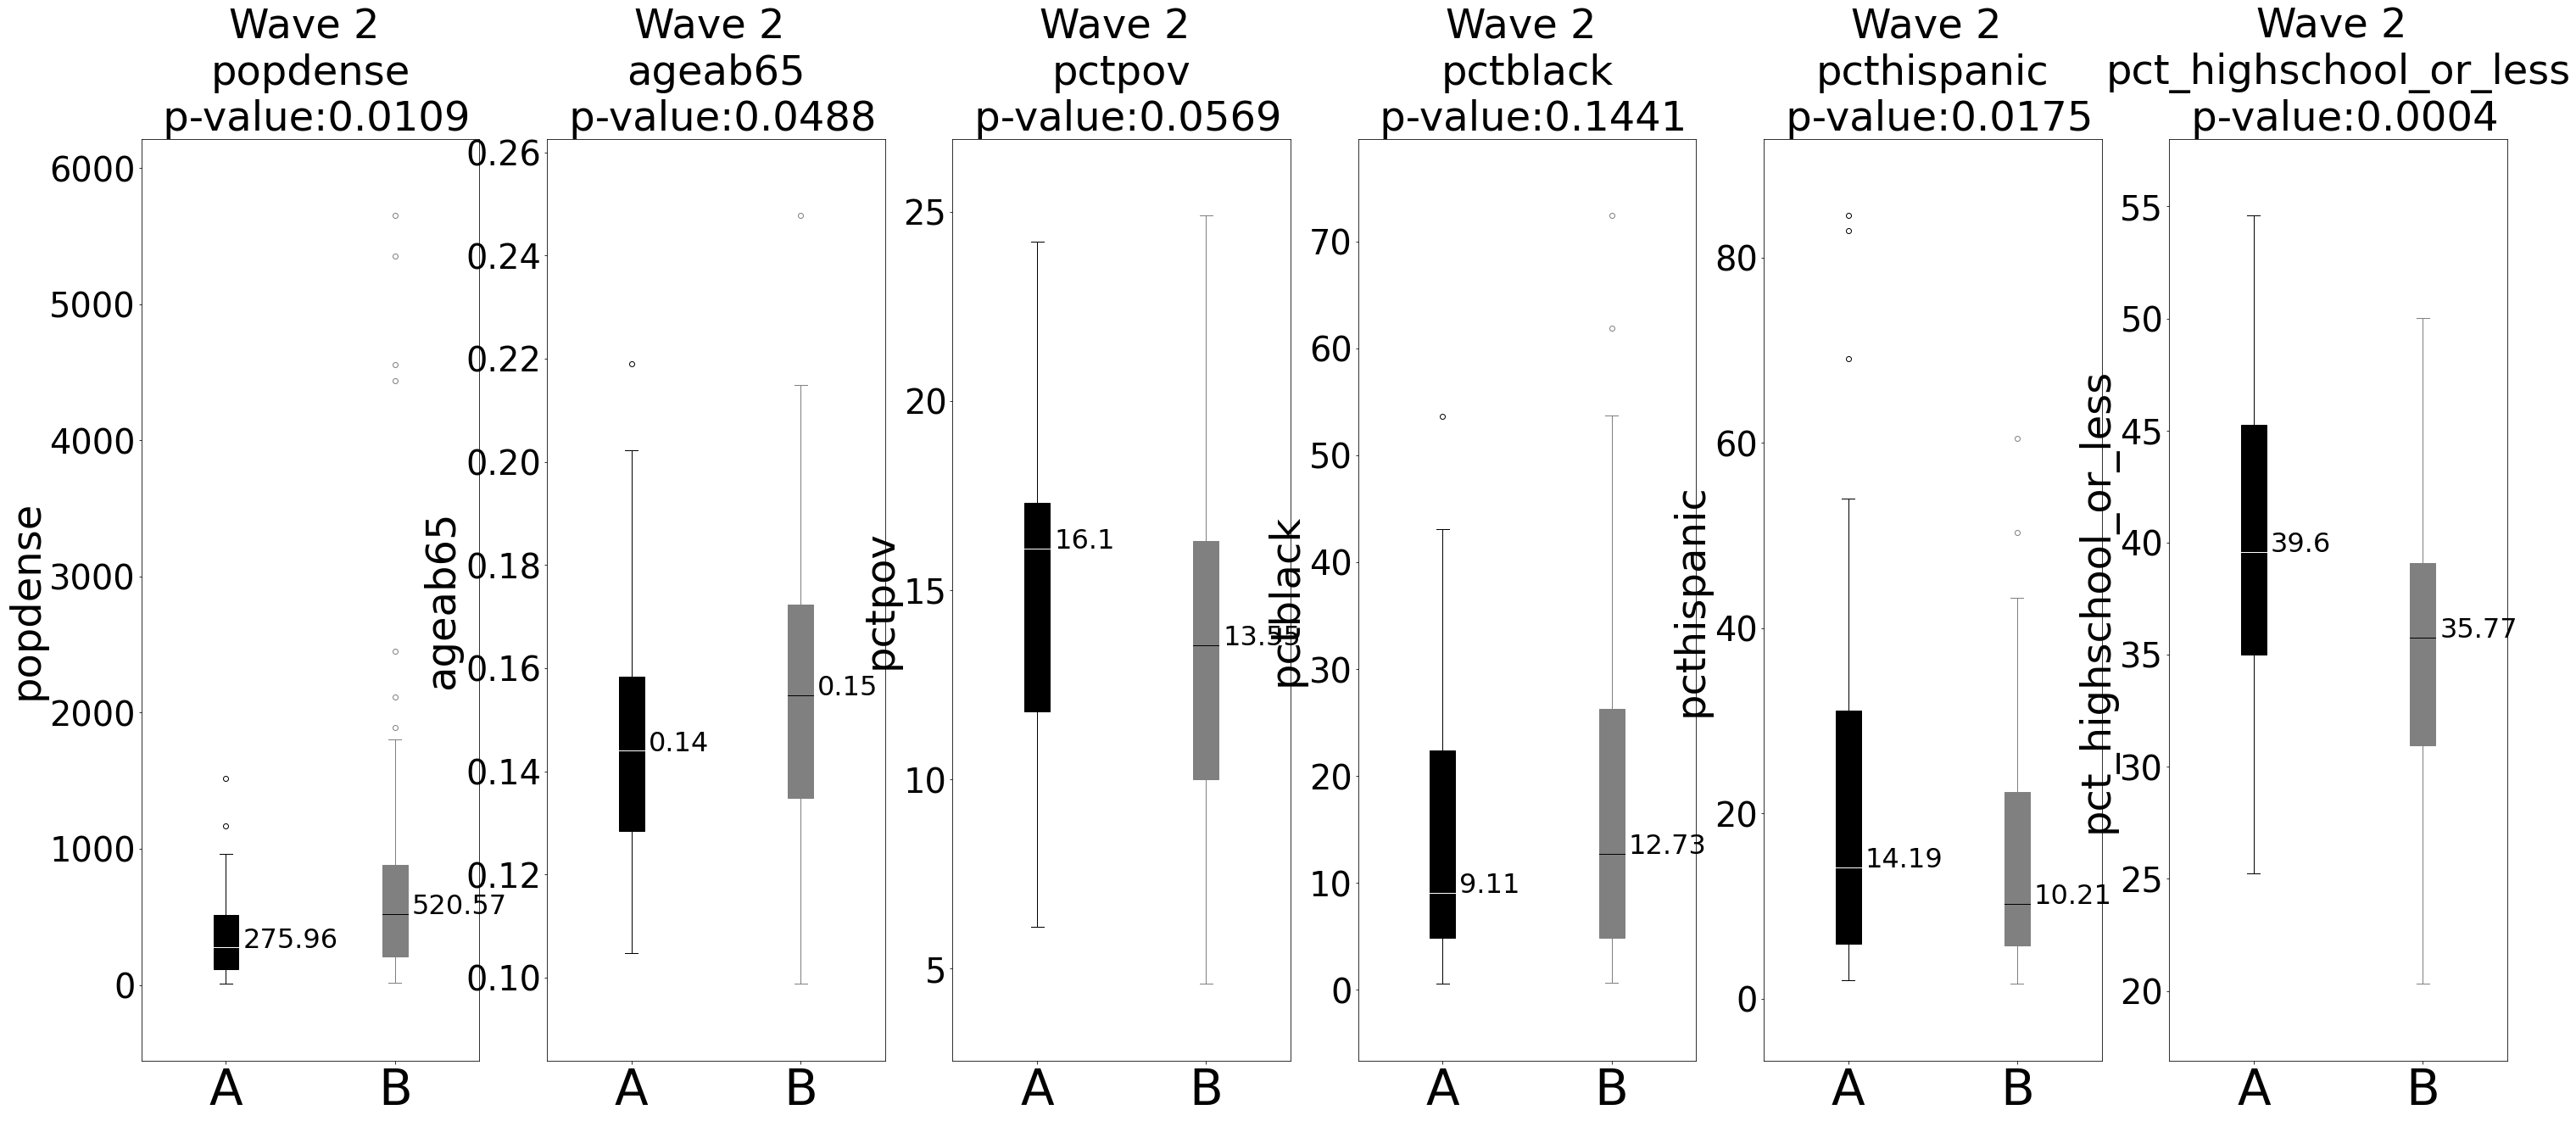

In [10]:
rdata = wave2_data.copy() 

rindex = [1, 2, 3, 4, 5, 6]
region = ['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'pct_highschool_or_less']

fig, ax = plt.subplots(1, 6,figsize=(50,20))

for i in rindex:

  para = region[i-1]

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],2)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(region[i-1], fontsize = 48)
  ax[i-1].set_title('Wave 2 \n' + region[i-1] + '\n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)

#### All Year

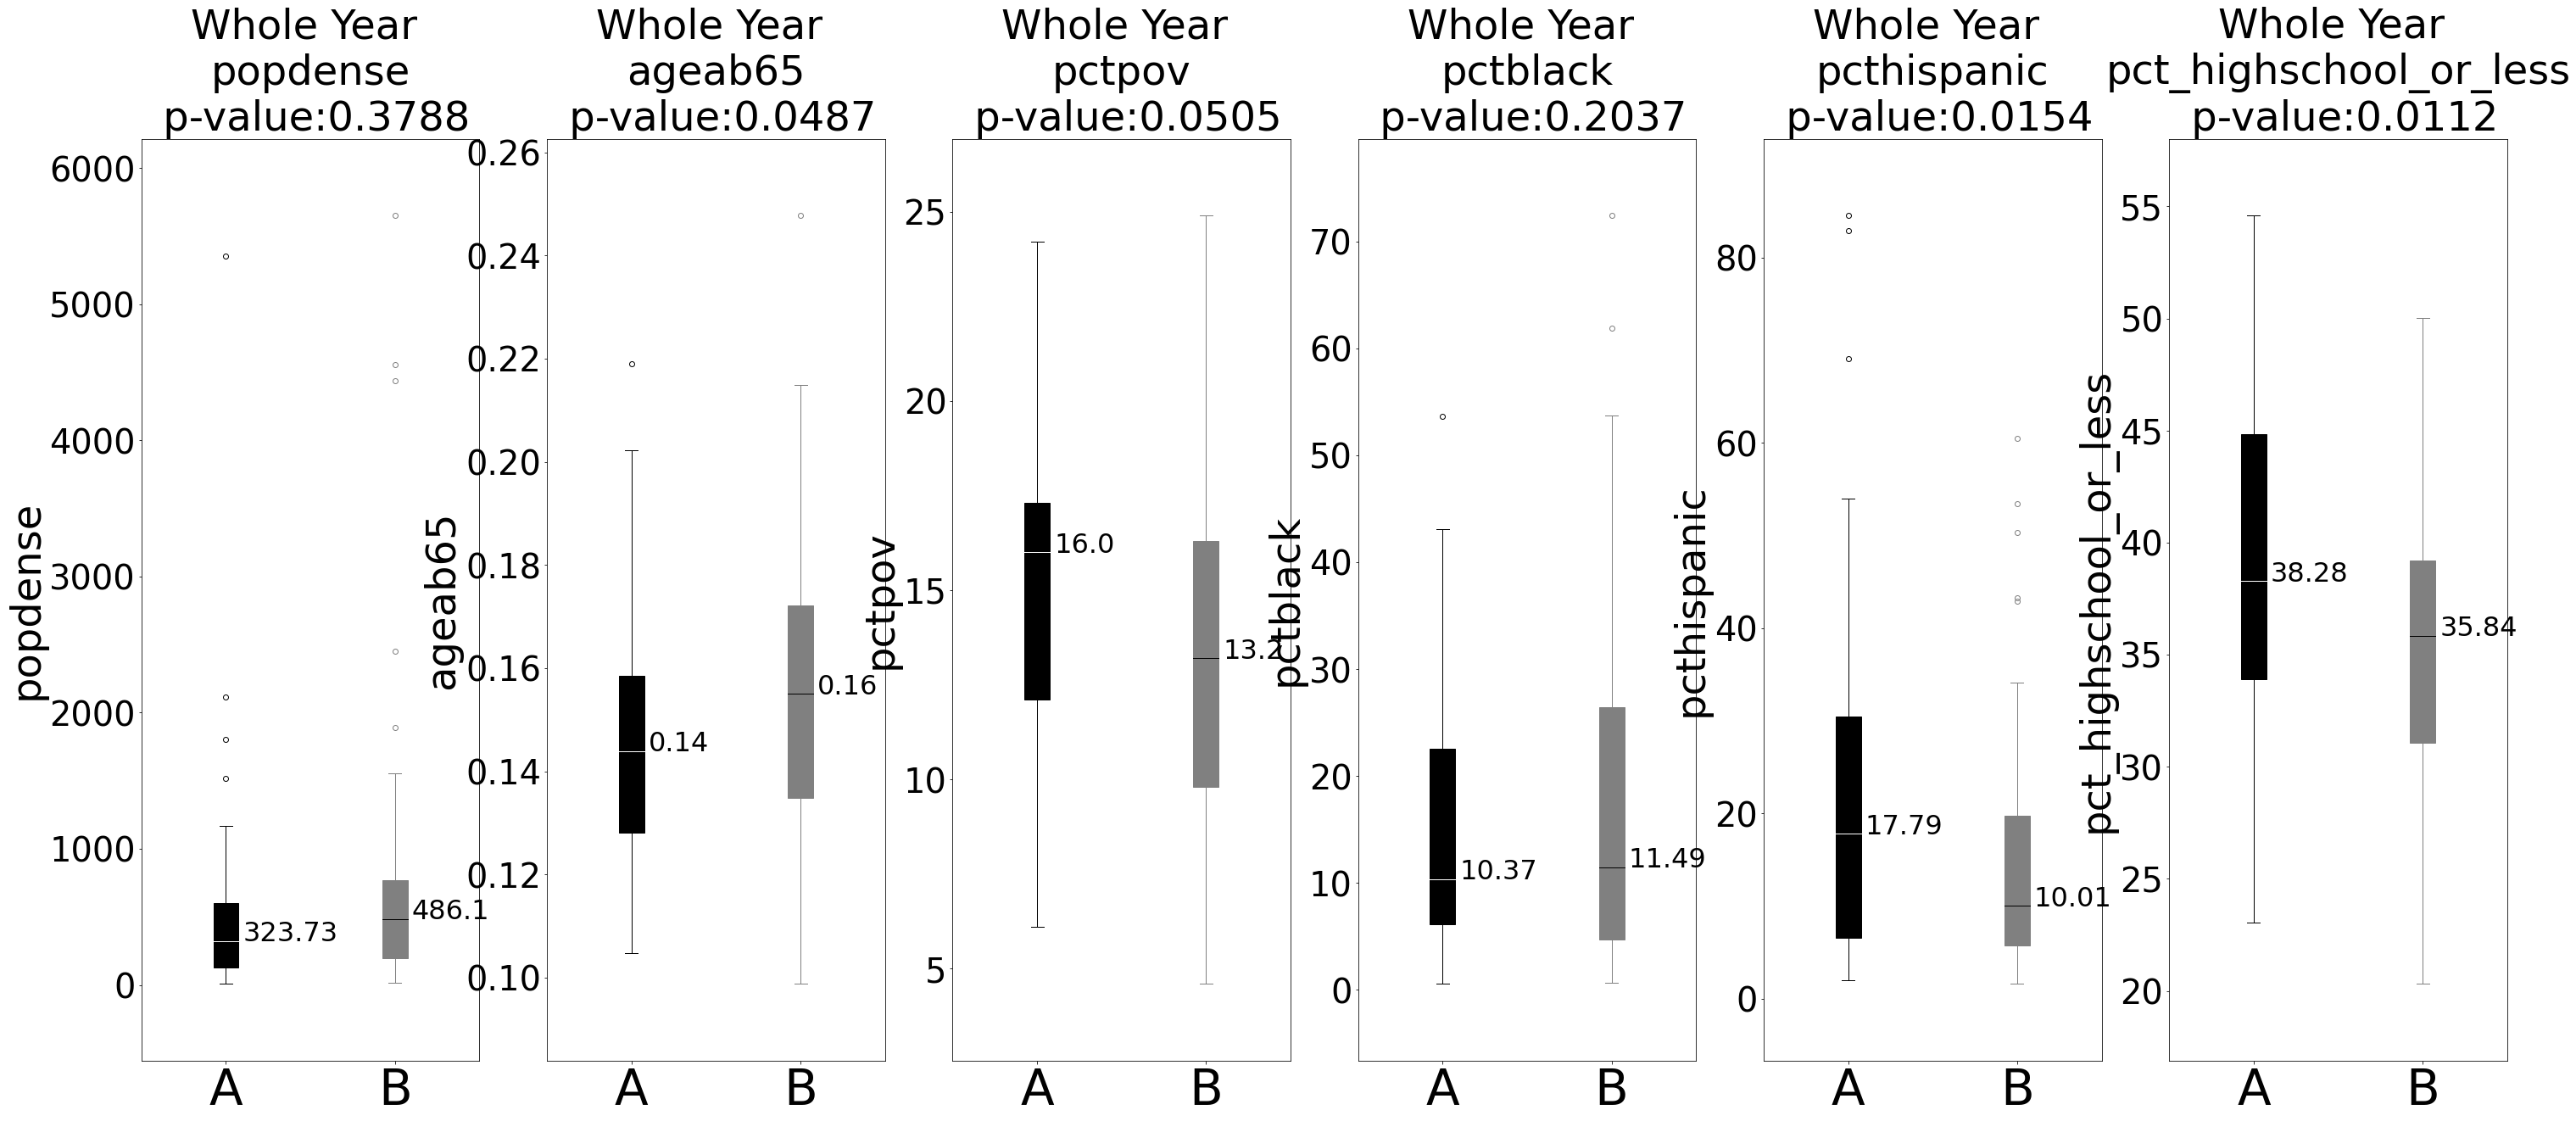

In [11]:
rdata = whole_data.copy() 

rindex = [1, 2, 3, 4, 5, 6]
region = ['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'pct_highschool_or_less']

fig, ax = plt.subplots(1, 6,figsize=(50,20))

for i in rindex:

  para = region[i-1]

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],2)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(region[i-1], fontsize = 48)
  ax[i-1].set_title('Whole Year \n' + region[i-1] + '\n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)

### Figure 4

#### Wave 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


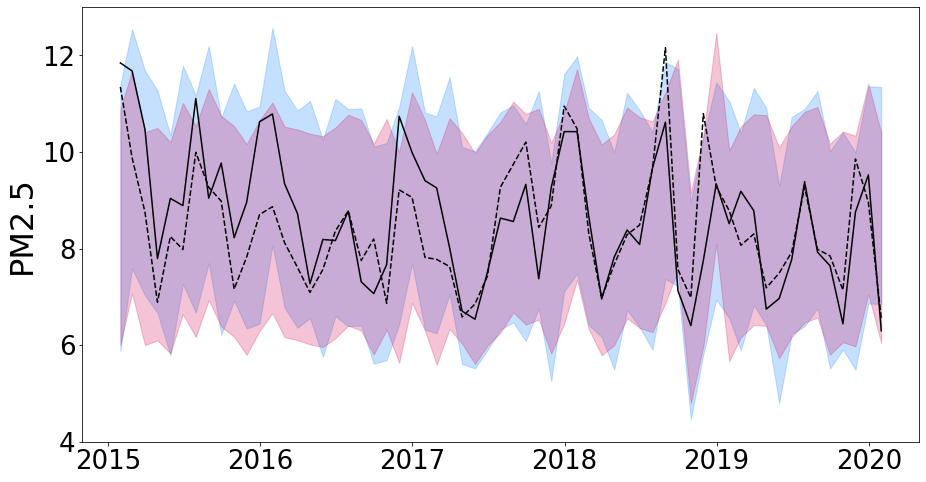

In [12]:
register_matplotlib_converters()

# EPA data
pm25 = pd.read_csv('/Data/timeseries data/pm25_timeseries_data.csv')

rdata = wave1_data.copy()

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
type0_list = [e for e in type0_list if e not in ['36103', '35045', '34027', '45019', '45079', '17163', '36029', '51087']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
type1_list = [e for e in type1_list if e not in ['13121', '22019', '05119', '16001', '48139', '26139', '26065', '41051', '23011']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('PM2.5', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(4,13)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


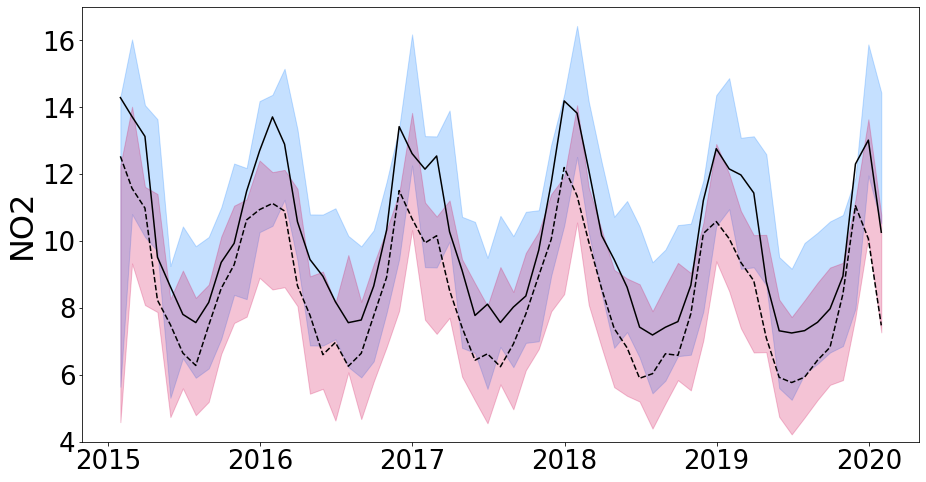

In [13]:
register_matplotlib_converters()

no2 = pd.read_csv('/Data/timeseries data/no2_timeseries_data.csv')

rdata = wave1_data.copy()

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()

no2type0 = no2[type0_list]
no2type0['Date Local'] = no2['Date Local']
groupedno2type0 = no2type0.groupby('Date Local').mean()
groupedno2type0 = groupedno2type0.mean(axis=1)

no2type1 = no2[type1_list]
no2type1['Date Local'] = no2['Date Local']
groupedno2type1 = no2type1.groupby('Date Local').mean()
groupedno2type1 = groupedno2type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedno2type0.index)
avgclust['values'] = groupedno2type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedno2type1.index)
avgclust['values'] = groupedno2type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('NO2', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(4,17)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:51

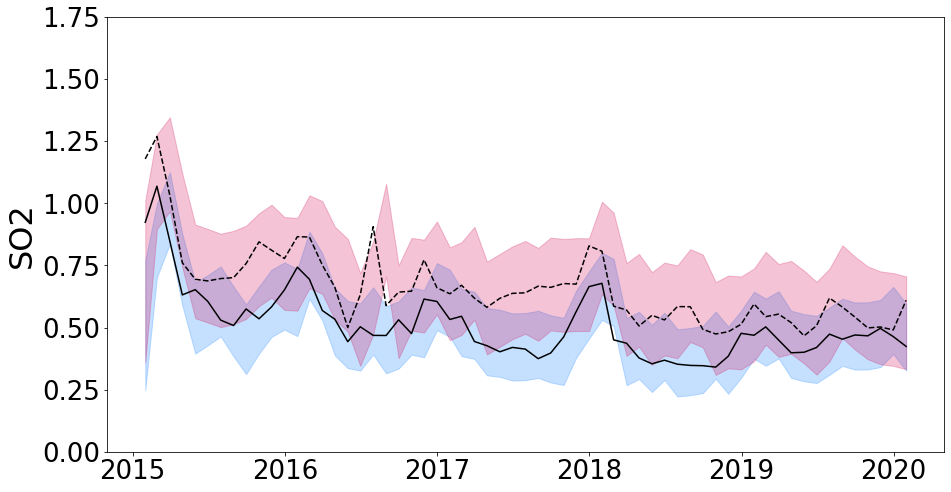

In [14]:
register_matplotlib_converters()

so2 = pd.read_csv('/Data/timeseries data/so2_timeseries_data.csv')

rdata = wave1_data.copy()

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()

so2type0 = so2[type0_list]
so2type0['Date Local'] = so2['Date Local']
groupedso2type0 = so2type0.groupby('Date Local').mean()
groupedso2type0 = groupedso2type0.mean(axis=1)

so2type1 = so2[type1_list]
so2type1['Date Local'] = so2['Date Local']
groupedso2type1 = so2type1.groupby('Date Local').mean()
groupedso2type1 = groupedso2type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedso2type0.index)
avgclust['values'] = groupedso2type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedso2type1.index)
avgclust['values'] = groupedso2type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('SO2', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(0.0,1.75)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-pack

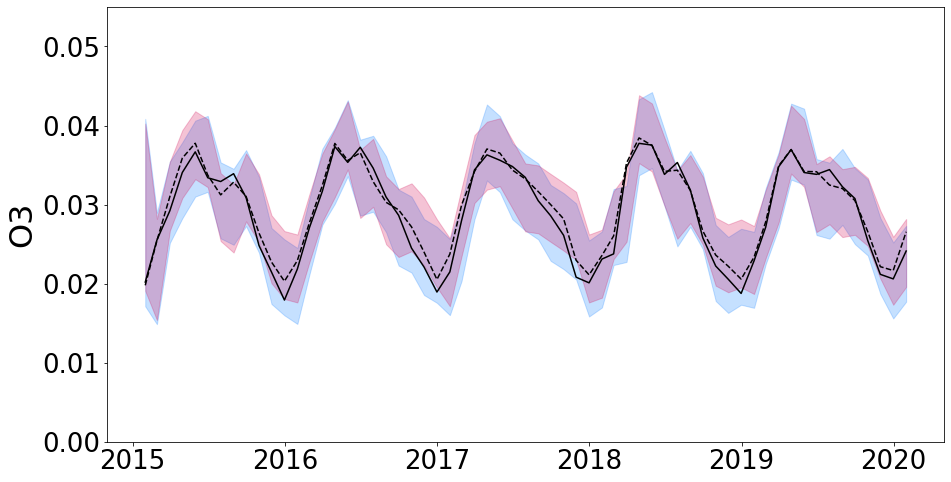

In [15]:
register_matplotlib_converters()

o3 = pd.read_csv('/Data/timeseries data/ozone_timeseries_data.csv')

rdata = wave1_data.copy()

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()

o3type0 = o3[type0_list]
o3type0['Date Local'] = o3['Date Local']
groupedo3type0 = o3type0.groupby('Date Local').mean()
groupedo3type0 = groupedo3type0.mean(axis=1)

o3type1 = o3[type1_list]
o3type1['Date Local'] = o3['Date Local']
groupedo3type1 = o3type1.groupby('Date Local').mean()
groupedo3type1 = groupedo3type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedo3type0.index)
avgclust['values'] = groupedo3type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(3,0,0), trend='c', seasonal_order = (3, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedo3type1.index)
avgclust['values'] = groupedo3type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(3,0,0), trend='c', seasonal_order = (3, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('O3', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(0.00,0.055)

plt.show()

#### Wave 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


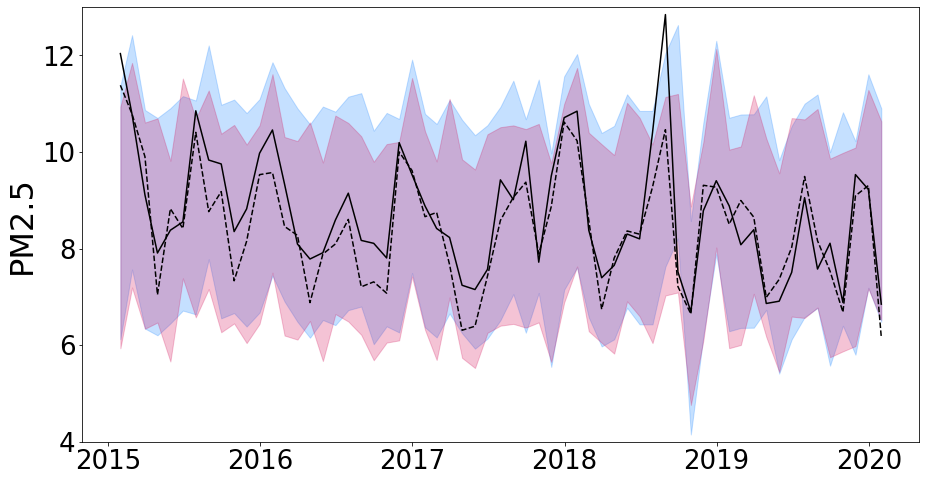

In [16]:
register_matplotlib_converters()

pm25 = pd.read_csv('/Data/timeseries data/pm25_timeseries_data.csv')

rdata = wave2_data.copy()

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
type0_list = [e for e in type0_list if e not in ['16001', '17163', '48139', '22019', '35045', '26139']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
type1_list = [e for e in type1_list if e not in ['05119', '45079', '45019', '13121', '26065', '36029', '36103', '51087', '41051', '34027', '23011']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('PM2.5', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(4,13)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


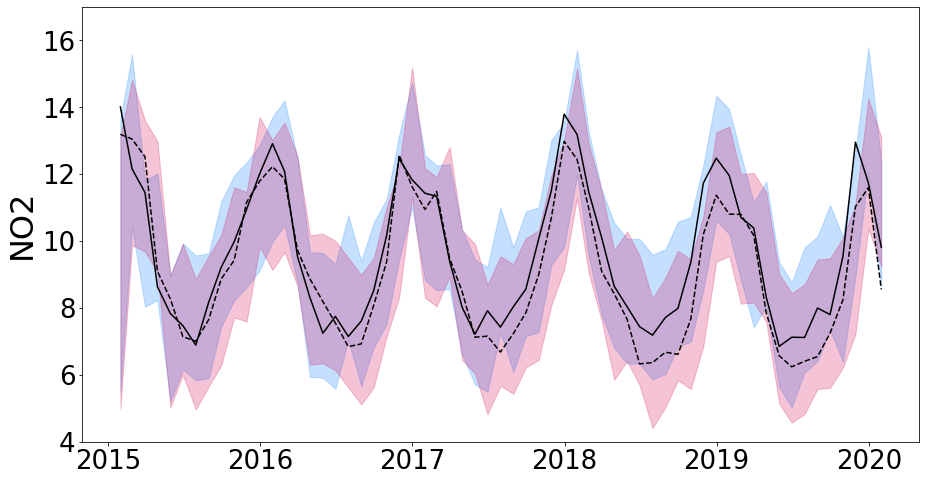

In [17]:
register_matplotlib_converters()

no2 = pd.read_csv('/Data/timeseries data/no2_timeseries_data.csv')

rdata = wave2_data.copy()

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()

no2type0 = no2[type0_list]
no2type0['Date Local'] = no2['Date Local']
groupedno2type0 = no2type0.groupby('Date Local').mean()
groupedno2type0 = groupedno2type0.mean(axis=1)

no2type1 = no2[type1_list]
no2type1['Date Local'] = no2['Date Local']
groupedno2type1 = no2type1.groupby('Date Local').mean()
groupedno2type1 = groupedno2type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedno2type0.index)
avgclust['values'] = groupedno2type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedno2type1.index)
avgclust['values'] = groupedno2type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('NO2', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(4,17)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:51

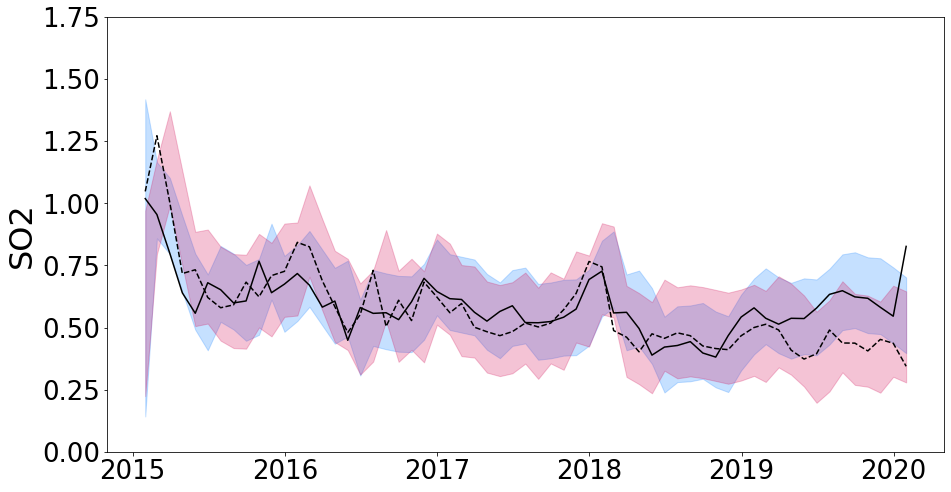

In [18]:
register_matplotlib_converters()

so2 = pd.read_csv('/Data/timeseries data/so2_timeseries_data.csv')

rdata = wave2_data.copy()

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()

so2type0 = so2[type0_list]
so2type0['Date Local'] = so2['Date Local']
groupedso2type0 = so2type0.groupby('Date Local').mean()
groupedso2type0 = groupedso2type0.mean(axis=1)

so2type1 = so2[type1_list]
so2type1['Date Local'] = so2['Date Local']
groupedso2type1 = so2type1.groupby('Date Local').mean()
groupedso2type1 = groupedso2type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedso2type0.index)
avgclust['values'] = groupedso2type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (3, 0, 1, 4))
results1 = model.fit()
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedso2type1.index)
avgclust['values'] = groupedso2type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (3, 0, 1, 4))
results1 = model.fit()
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('SO2', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(0.0,1.75)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-pack

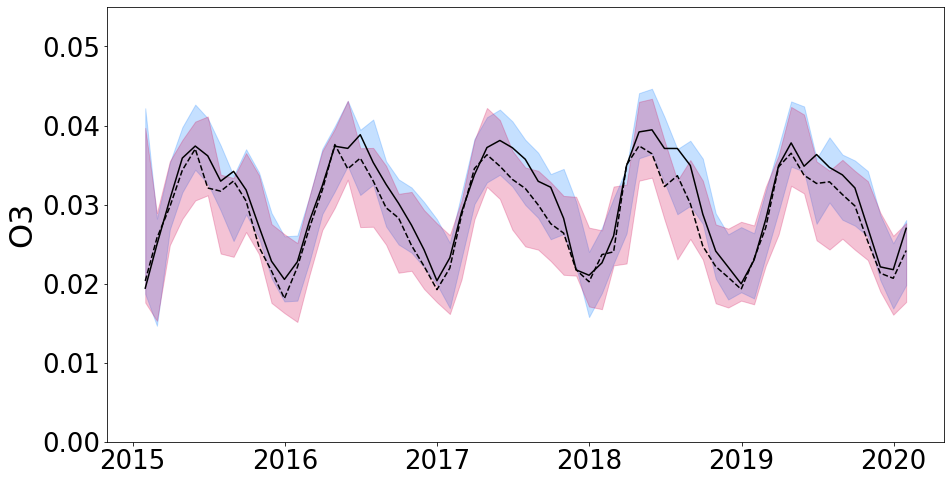

In [19]:
register_matplotlib_converters()

o3 = pd.read_csv('/Data/timeseries data/ozone_timeseries_data.csv')

rdata = wave2_data.copy()

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()

o3type0 = o3[type0_list]
o3type0['Date Local'] = o3['Date Local']
groupedo3type0 = o3type0.groupby('Date Local').mean()
groupedo3type0 = groupedo3type0.mean(axis=1)

o3type1 = o3[type1_list]
o3type1['Date Local'] = o3['Date Local']
groupedo3type1 = o3type1.groupby('Date Local').mean()
groupedo3type1 = groupedo3type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedo3type0.index)
avgclust['values'] = groupedo3type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(3,0,0), trend='c', seasonal_order = (3, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedo3type1.index)
avgclust['values'] = groupedo3type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(3,0,0), trend='c', seasonal_order = (3, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('O3', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(0.00,0.055)

plt.show()

#### All Year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels

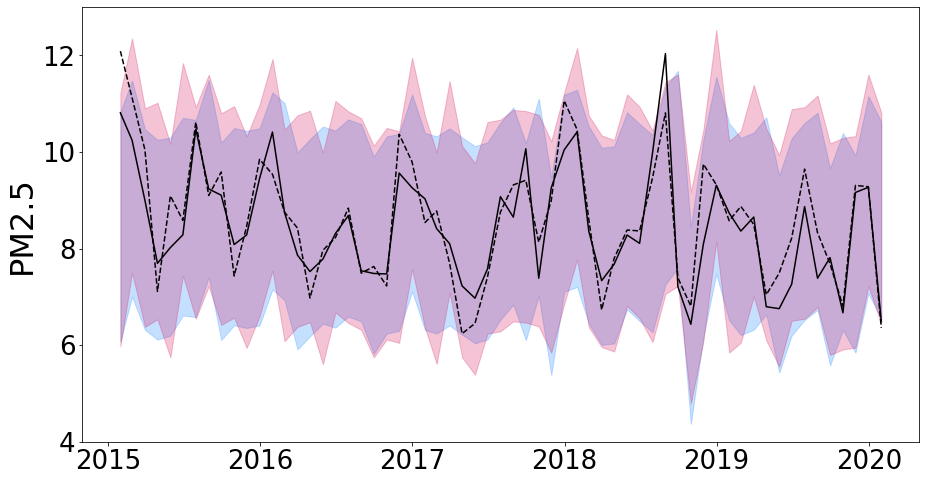

In [20]:
register_matplotlib_converters()

# EPA data
pm25 = pd.read_csv('/Data/timeseries data/pm25_timeseries_data.csv')

rdata = whole_data.copy()

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()
type0_list = [e for e in type0_list if e not in ['16001', '35045', '17163', '48139', '22019']]

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()
type1_list = [e for e in type1_list if e not in ['36103', '26139', '45079', '05119', '45019', '13121', '36029', '26065', '34027', '51087', '41051', '23011']]

pm25type0 = pm25[type0_list]
pm25type0['Date Local'] = pm25['Date Local']
groupedpm25type0 = pm25type0.groupby('Date Local').mean()
groupedpm25type0 = groupedpm25type0.mean(axis=1)

pm25type1 = pm25[type1_list]
pm25type1['Date Local'] = pm25['Date Local']
groupedpm25type1 = pm25type1.groupby('Date Local').mean()
groupedpm25type1 = groupedpm25type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type0.index)
avgclust['values'] = groupedpm25type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedpm25type1.index)
avgclust['values'] = groupedpm25type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('PM2.5', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(4,13)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


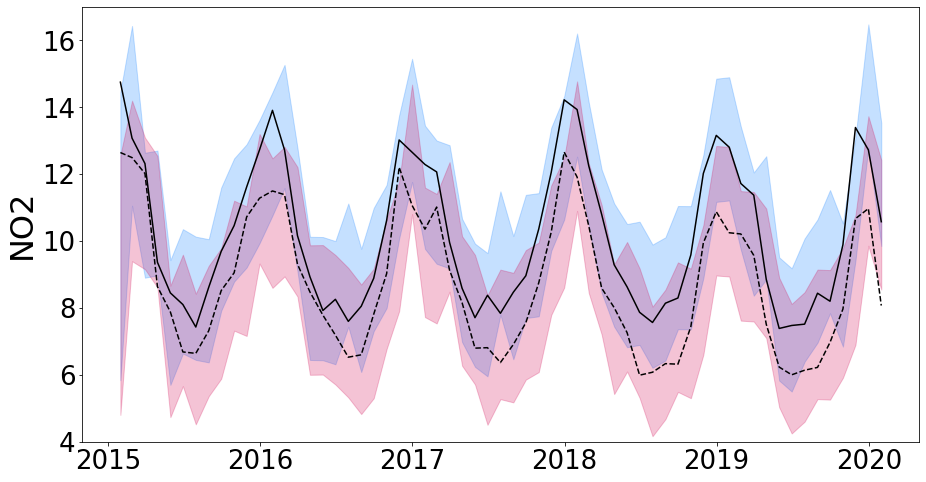

In [21]:
register_matplotlib_converters()

no2 = pd.read_csv('/Data/timeseries data/no2_timeseries_data.csv')

rdata = whole_data.copy()

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()

no2type0 = no2[type0_list]
no2type0['Date Local'] = no2['Date Local']
groupedno2type0 = no2type0.groupby('Date Local').mean()
groupedno2type0 = groupedno2type0.mean(axis=1)

no2type1 = no2[type1_list]
no2type1['Date Local'] = no2['Date Local']
groupedno2type1 = no2type1.groupby('Date Local').mean()
groupedno2type1 = groupedno2type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedno2type0.index)
avgclust['values'] = groupedno2type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedno2type1.index)
avgclust['values'] = groupedno2type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('NO2', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(4,17)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:51

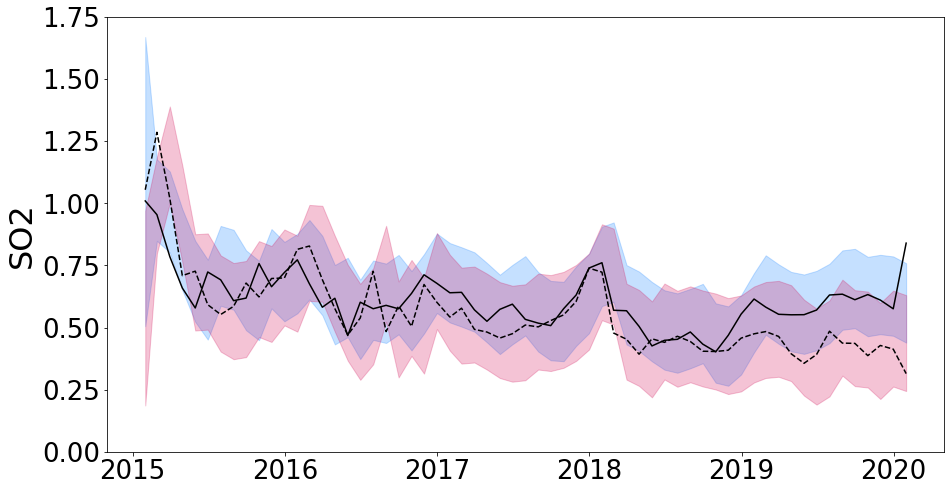

In [22]:
register_matplotlib_converters()

so2 = pd.read_csv('/Data/timeseries data/so2_timeseries_data.csv')

rdata = whole_data.copy()

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()

so2type0 = so2[type0_list]
so2type0['Date Local'] = so2['Date Local']
groupedso2type0 = so2type0.groupby('Date Local').mean()
groupedso2type0 = groupedso2type0.mean(axis=1)

so2type1 = so2[type1_list]
so2type1['Date Local'] = so2['Date Local']
groupedso2type1 = so2type1.groupby('Date Local').mean()
groupedso2type1 = groupedso2type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedso2type0.index)
avgclust['values'] = groupedso2type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedso2type1.index)
avgclust['values'] = groupedso2type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(2,0,0), trend='c', seasonal_order = (2, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('SO2', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(0.0,1.75)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-pack

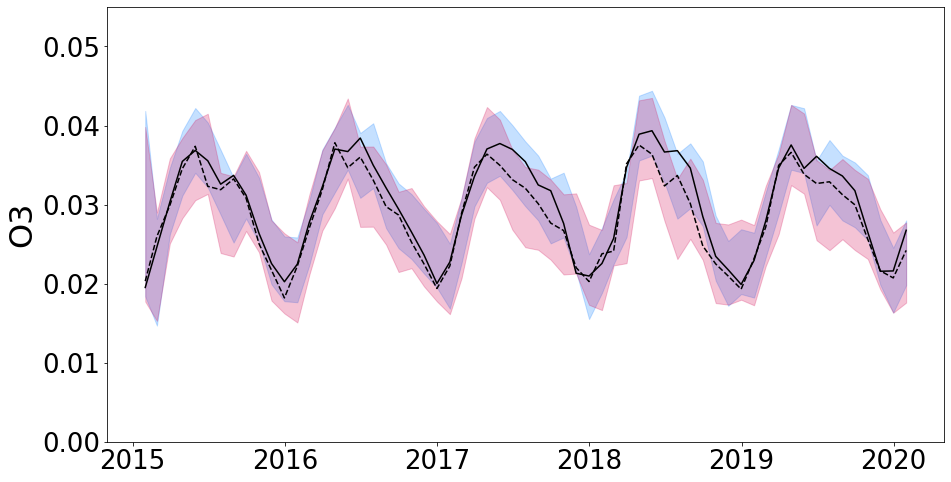

In [23]:
register_matplotlib_converters()

o3 = pd.read_csv('/Data/timeseries data/ozone_timeseries_data.csv')

rdata = whole_data.copy()

type0_list = rdata[rdata['type'] == 0]['fips'].tolist()

type1_list = rdata[rdata['type'] == 1]['fips'].tolist()

o3type0 = o3[type0_list]
o3type0['Date Local'] = o3['Date Local']
groupedo3type0 = o3type0.groupby('Date Local').mean()
groupedo3type0 = groupedo3type0.mean(axis=1)

o3type1 = o3[type1_list]
o3type1['Date Local'] = o3['Date Local']
groupedo3type1 = o3type1.groupby('Date Local').mean()
groupedo3type1 = groupedo3type1.mean(axis=1)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedo3type0.index)
avgclust['values'] = groupedo3type0.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(3,0,0), trend='c', seasonal_order = (3, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.figure(figsize = (15,8))
plt.plot(avgclust.index, avgclust['values'], color='black')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#1A85FF", 
                  alpha=0.25)

avgclust = pd.DataFrame()
avgclust['datetime'] = pd.to_datetime(groupedo3type1.index)
avgclust['values'] = groupedo3type1.values.tolist()
avgclust = avgclust.groupby(pd.Grouper(key='datetime', freq='M')).mean()

model = SARIMAX(avgclust['values'], order=(3,0,0), trend='c', seasonal_order = (3, 0, 0, 4))
results1 = model.fit()
epiact = avgclust
plt.plot(avgclust.index, avgclust['values'], color='black', linestyle='dashed')
resultdf = results1.get_prediction(start=0).conf_int()

plt.fill_between( resultdf.index, 
                  resultdf['lower values'], 
                  resultdf['upper values'], 
                  color="#D41159", 
                  alpha=0.25)

plt.ylabel('O3', fontsize = 32)
plt.tick_params(axis='both', labelsize = 26)
plt.ylim(0.00,0.055)

plt.show()